# Cleaning and Preprocessing
## These two notebooks use machine learning as a solution for the titanic solutions
## Any help is appricated

## Project info
This is a project to determind who would live and die from the titanic records. The data came in three csv files;
- train.csv
- test.csv
- gender_submission.csv

## Workflow
1. Exmainn the data
2. clean the data
3. Process data
4. Load it into NPZ

In [37]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import random
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Aquire data
Becauses the data is unfamilure it going to be loaded into pandas instead of numpy. Even though pandas is slower this project is less time sensitve.

In [2]:
raw_train_data = pd.read_csv('train.csv')
raw_test_data = pd.read_csv('test.csv')
gender_data_set = pd.read_csv('gender_submission.csv')

## First Look at Train
What can be seen from the data; 
- Train data is 891x12 materix.
- The target is Survived
- PassengerId is an Identier

In [3]:
raw_train_data 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## First Look at Test
What can be seen from the data; 
- Train data is 418x11 materix.
- The target is Survived
- PassengerId is an Identier
- Unlike in test there is no survived so there is no target

In [4]:
raw_test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## First Look at Gender Data
What can be seen from the data; 
- Train data is 418x2 materix.
- This contains the missing survived from test

In [5]:
gender_data_set

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


## What to do about Gender
Because this is going to use Tensor flow it would be best to just combine the test and gender data sheets

In [6]:
joined_raw_data_test = pd.merge(gender_data_set, raw_test_data, on='PassengerId')
joined_raw_data_test

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## Looking at the data
### Train & Test:
        - Train is a mostly int columns
        - it has several catagorical data
        - There are some nan values in both dataframes but not the same columns

In [7]:
raw_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [241]:
joined_raw_data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 42.5+ KB


In [8]:
raw_train_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [242]:
joined_raw_data_test.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Kelly, Mr. James",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


In [9]:
raw_train_data.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [10]:
joined_raw_data_test.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool

# Cleaning the Data
### The overview of the data
    The data overall looks fine but there not a lot of it. In normal MS model you would want an 80% train, 10% valdiation, and 10% test. This project does not natural have those rations. For Training and Valdation train data set will be split 90% to 10%.
    The data sets have the same columns, some different nan values in different columns, but are close enough for them to be concat. This will just be used to make the cleaning process similer
    
### Game Plan for preprocessing
- Concat the data frames
- PassengerId, Name, Ticket, Cabin can be dropped
 - PassengerId is an identifer
 - All names are unique
 - Tickets and Cabin are also almost all unique
- Sex and Embarked will be converted from string catogry to int catgpery
- Random Values will be added to nan
- Convert all floats to int

## Conact data frames

In [11]:
joined_frame = pd.concat([raw_train_data,joined_raw_data_test])
joined_frame

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## Drop data columns of little use

In [13]:
droped_joined_frame = joined_frame.drop(columns=['PassengerId','Name','Ticket','Cabin'])
droped_joined_frame

## Gender Swap
Males will be 0 and Females will be one

In [30]:
gender = {'male': 0,'female': 1}
gender_data_set = droped_joined_frame.copy()
gender_data_set.Sex = [gender[item] for item in gender_data_set.Sex]
gender_data_set

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
413,0,3,0,NaN,0,0,8.0500,S
414,1,1,1,39.0,0,0,108.9000,C
415,0,3,0,38.5,0,0,7.2500,S
416,0,3,0,NaN,0,0,8.0500,S


## Embarked Changed

In [31]:
embarked = {'S': 1,'C': 2,'Q':3 ,np.nan:np.nan}
embarked_data_set = gender_data_set.copy()
embarked_data_set.Embarked = [embarked[item] for item in embarked_data_set.Embarked]
embarked_data_set

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,1.0
1,1,1,1,38.0,1,0,71.2833,2.0
2,1,3,1,26.0,0,0,7.9250,1.0
3,1,1,1,35.0,1,0,53.1000,1.0
4,0,3,0,35.0,0,0,8.0500,1.0
...,...,...,...,...,...,...,...,...
413,0,3,0,NaN,0,0,8.0500,1.0
414,1,1,1,39.0,0,0,108.9000,2.0
415,0,3,0,38.5,0,0,7.2500,1.0
416,0,3,0,NaN,0,0,8.0500,1.0


## Dealing with nan
There are a lot of nan, not in every columns but enough. Instead of deleting them random numbers with in the range of the max and min will replace each nan in it respective column. This is done becauses there not that many data points to begine with.

In [88]:
def nan_refuse_number(df, col):
    return df[col].mask(df[col].isnull(), np.random.randint(min(df[col]), 
                                                            max(df[col]), 
                                                            size=df[col].shape))

In [91]:
remove_nan = ('Age','Embarked','Fare')
no_nan_data = embarked_data_set.copy()
for column in remove_nan:
    no_nan_data[column] = nan_refuse_number(no_nan_data,column)
no_nan_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,1.0
1,1,1,1,38.0,1,0,71.2833,2.0
2,1,3,1,26.0,0,0,7.9250,1.0
3,1,1,1,35.0,1,0,53.1000,1.0
4,0,3,0,35.0,0,0,8.0500,1.0
...,...,...,...,...,...,...,...,...
413,0,3,0,44.0,0,0,8.0500,1.0
414,1,1,1,39.0,0,0,108.9000,2.0
415,0,3,0,38.5,0,0,7.2500,1.0
416,0,3,0,65.0,0,0,8.0500,1.0


## Data Type
Now that there are no strings or nan all the data types are converted to int

In [99]:
no_nan_data.astype('int32').dtypes

Survived    int32
Pclass      int32
Sex         int32
Age         int32
SibSp       int32
Parch       int32
Fare        int32
Embarked    int32
dtype: object

# Pearson Correlation of Features
Below is a Pearson Correlation of feature. Knowning Surived is the target we can look at the correlation
The top row indicates correlation between passanger survived and other variables that influence their survial 
- The biggest impact on survial is sex, with female being larger id than male more females surived
- Pclass had a negitive Correlation. Because higher classes are lower numbers, those passangers with better accomidations surived at higher rates
- There is a positive correlation between passanger surivial and fare. Logicaly this means that higher price tickets lead to better treatment.
- Have a family and where the passanger left from also had an smaller impact on surival than the other previously mention varabiles
- The other varaiables had very little impact

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

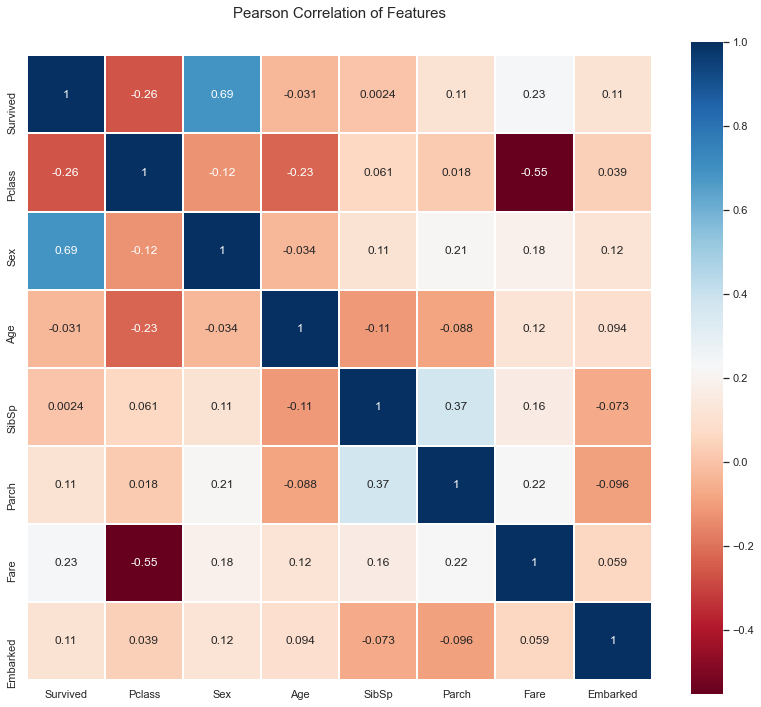

In [100]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(no_nan_data.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

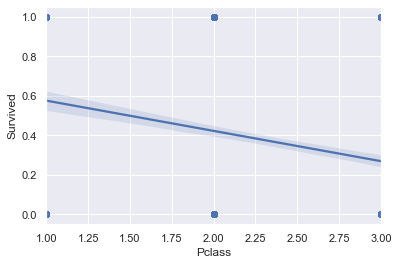

In [131]:
sns.regplot(x="Pclass", y="Survived", data=no_nan_data)

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

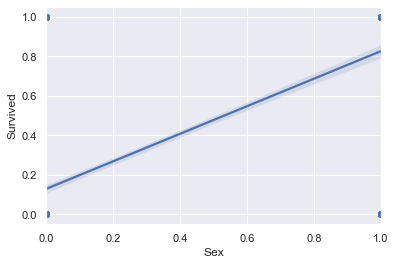

In [132]:
sns.regplot(x="Sex", y="Survived", data=no_nan_data)

<AxesSubplot:xlabel='Fare', ylabel='Survived'>

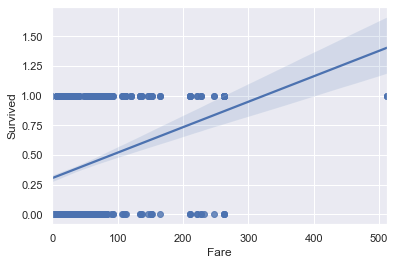

In [133]:
sns.regplot(x="Fare", y="Survived", data=no_nan_data)

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

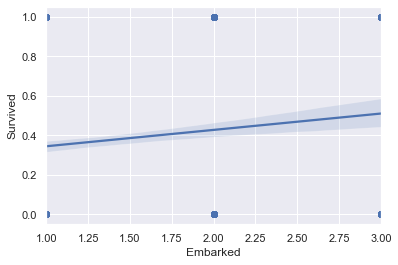

In [134]:
sns.regplot(x="Embarked", y="Survived", data=no_nan_data)

# Preparing for ML Modle
With some understanding of the data its time to prepair the data from the ML model.

### The steps
- Create Dummies
- Standardize data
- Balance the Data set
- Split training into Val and train
- Create NPZ

## Dummies

In [146]:
dummie_data_value = pd.get_dummies(no_nan_data.Embarked, prefix='Embarked')
Embarked_dummie_data_set = pd.concat([no_nan_data.iloc[:,:-1], dummie_data_value], axis=1)

In [147]:
Embarked_dummie_data_set

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_1.0,Embarked_2.0,Embarked_3.0
0,0,3,0,22.0,1,0,7.2500,1,0,0
1,1,1,1,38.0,1,0,71.2833,0,1,0
2,1,3,1,26.0,0,0,7.9250,1,0,0
3,1,1,1,35.0,1,0,53.1000,1,0,0
4,0,3,0,35.0,0,0,8.0500,1,0,0
...,...,...,...,...,...,...,...,...,...,...
413,0,3,0,44.0,0,0,8.0500,1,0,0
414,1,1,1,39.0,0,0,108.9000,0,1,0
415,0,3,0,38.5,0,0,7.2500,1,0,0
416,0,3,0,65.0,0,0,8.0500,1,0,0


In [153]:
dummie_data_value = pd.get_dummies(no_nan_data.Pclass, prefix='Pclass')
p_class_dummie_data_set = pd.concat([Embarked_dummie_data_set, dummie_data_value], axis=1)
p_class_dummie_data_set = p_class_dummie_data_set.drop(['Pclass'], axis=1)
p_class_dummie_data_set

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked_1.0,Embarked_2.0,Embarked_3.0,Pclass_1,Pclass_2,Pclass_3
0,0,0,22.0,1,0,7.2500,1,0,0,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,1,0,0
2,1,1,26.0,0,0,7.9250,1,0,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,1,0,0
4,0,0,35.0,0,0,8.0500,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,0,0,44.0,0,0,8.0500,1,0,0,0,0,1
414,1,1,39.0,0,0,108.9000,0,1,0,1,0,0
415,0,0,38.5,0,0,7.2500,1,0,0,0,0,1
416,0,0,65.0,0,0,8.0500,1,0,0,0,0,1


In [156]:
dummie_data_value = pd.get_dummies(no_nan_data.Sex, prefix='Sex')
unscaled_data = pd.concat([p_class_dummie_data_set, dummie_data_value], axis=1)
unscaled_data = unscaled_data.drop(['Sex'], axis=1)
unscaled_data

,Survived,Age,SibSp,Parch,Fare,Embarked_1.0,Embarked_2.0,Embarked_3.0,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1
0,0,22.0,1,0,7.2500,1,0,0,0,0,1,1,0
1,1,38.0,1,0,71.2833,0,1,0,1,0,0,0,1
2,1,26.0,0,0,7.9250,1,0,0,0,0,1,0,1
3,1,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,0,35.0,0,0,8.0500,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0,44.0,0,0,8.0500,1,0,0,0,0,1,1,0
414,1,39.0,0,0,108.9000,0,1,0,1,0,0,0,1
415,0,38.5,0,0,7.2500,1,0,0,0,0,1,1,0
416,0,65.0,0,0,8.0500,1,0,0,0,0,1,1,0


## Create Targets and Inputs

In [207]:
target = unscaled_data['Survived'].to_numpy()
inputs = unscaled_data.drop(['Survived'], axis=1).to_numpy()

## Standard Inputs

In [187]:
scaled_inputs = preprocessing.scale(inputs)

## Break apart sets

In [232]:
val_train_targets = target[:891]
val_train_inputs = scaled_inputs[:891]

test_targets = target[891:]
test_inputs = scaled_inputs[891:]

342

## Balance Data Sheet

In [237]:
num_one_targets = int(np.sum(val_train_targets))
zero_targets_counter = 0
indices_to_remove = []

for i in range(val_train_targets.shape[0]):
    if val_train_targets[i] ==0:
        zero_targets_counter += 1
        if zero_targets_counter > num_one_targets:
            indices_to_remove.append(i)
            
inputs_equal_priors = np.delete(val_train_inputs, indices_to_remove, axis = 0)
targets_equal_priors = np.delete (val_train_targets, indices_to_remove, axis=0)

## Shuffle Data

In [238]:
shuffled_indices = np.arange(inputs_equal_priors.shape[0])
np.random.shuffle(shuffled_indices)
shuffled_inputs = inputs_equal_priors[shuffled_indices]
shuffled_targets = targets_equal_priors[shuffled_indices]

342

## Create Split

In [239]:
samples_count = shuffled_inputs.shape[0]

train_samples_count = int(0.9*samples_count)
validation_samples_count = samples_count - train_samples_count

train_inputs = shuffled_inputs[:train_samples_count]
train_targets = shuffled_targets[:train_samples_count]

validation_inputs = shuffled_inputs[train_samples_count:]
validation_targets = shuffled_targets[train_samples_count:]

print(np.sum(train_targets), train_samples_count, np.sum(train_targets) / train_samples_count)
print(np.sum(validation_targets), validation_samples_count, np.sum(validation_targets) / validation_samples_count)

307 615 0.4991869918699187
35 69 0.5072463768115942


In [240]:
np.savez('data_train', inputs=train_inputs, targets=train_targets)
np.savez('data_validation', inputs=validation_inputs, targets=validation_targets)
np.savez('data_test', inputs=test_inputs, targets=test_targets)